In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split



# ENGLISH PREMIER LEAGUE 2017/2018

In [12]:
df = pd.read_csv("data.csv")

This dataset was taken from Kaggle site and it is composed as follows:

- name: Name of the player.
- club: Club of the player.
- age: Age of the player.
- position: The usual position on the pitch.
- position_cat: 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers.
- market_value : As on transfermrkt.com on July 20th, 2017.
- page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017.
- fpl_value : Value in Fantasy Premier League as on July 20th, 2017.
- fpl_sel : % of FPL players who have selected that player in their team.
- fpl_points : FPL points accumulated over the previous season.
- region: 1 for England, 2 for EU, 3 for Americas and 4 for Rest of the World.
- nationality: origin country.
- new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July).
- age_cat: age category.
- club_id
- big_club: Whether one of the Top 6 clubs.
- new_signing: Whether a new signing for 2017/18 (till 20th July).

This data is from 2017.





# EDA (Exploratory Data Analysis)

In [172]:
df.shape

(461, 17)

We have 461 rows and 17 columns

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [175]:
df.fpl_sel

0      17.10%
1       5.60%
2       5.90%
3       1.50%
4       0.70%
        ...  
456     0.40%
457     0.20%
458     0.30%
459     5.90%
460     0.10%
Name: fpl_sel, Length: 461, dtype: object

Looking at the fpl_sel column and in info, we know that fpl_sel is a percentage so it must be float but in the dataframe it is object type, so we will convert it.

In [178]:
df['fpl_sel'] = df['fpl_sel'].str.replace("%","")
df['fpl_sel'] = df['fpl_sel'].astype(float)

In [179]:
df.fpl_sel

0      17.1
1       5.6
2       5.9
3       1.5
4       0.7
       ... 
456     0.4
457     0.2
458     0.3
459     5.9
460     0.1
Name: fpl_sel, Length: 461, dtype: float64

In [13]:
df.head() 

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [16]:
df.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


Basic statistics about the dataframe

In [113]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.997831,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.961202,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


Let's see if there is missing data:

In [19]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

It looks like there is only one empty register at column region, lets look at it:

In [28]:
df.region[pd.isna(df['region'])]

188   NaN
Name: region, dtype: float64

In [30]:
df.iloc[188]

name            Steve Mounie
club            Huddersfield
age                       22
position                  CF
position_cat               1
market_value             5.5
page_views                56
fpl_value                6.0
fpl_sel                0.60%
fpl_points                 0
region                   NaN
nationality            Benin
new_foreign                0
age_cat                    2
club_id                    8
big_club                   0
new_signing                0
Name: 188, dtype: object

With a fast search at google we can see that Benin country is from Africa, so we can put it manually.

In [37]:
df['region'] = df['region'].replace(['NaN'],4)

In [41]:
df.loc[188,'region'] = 4

Lets check it again:

In [44]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

Lets look for duplicates:

In [181]:
df.duplicated().sum()

0

The are no duplicates.

We can continue on our EDA.

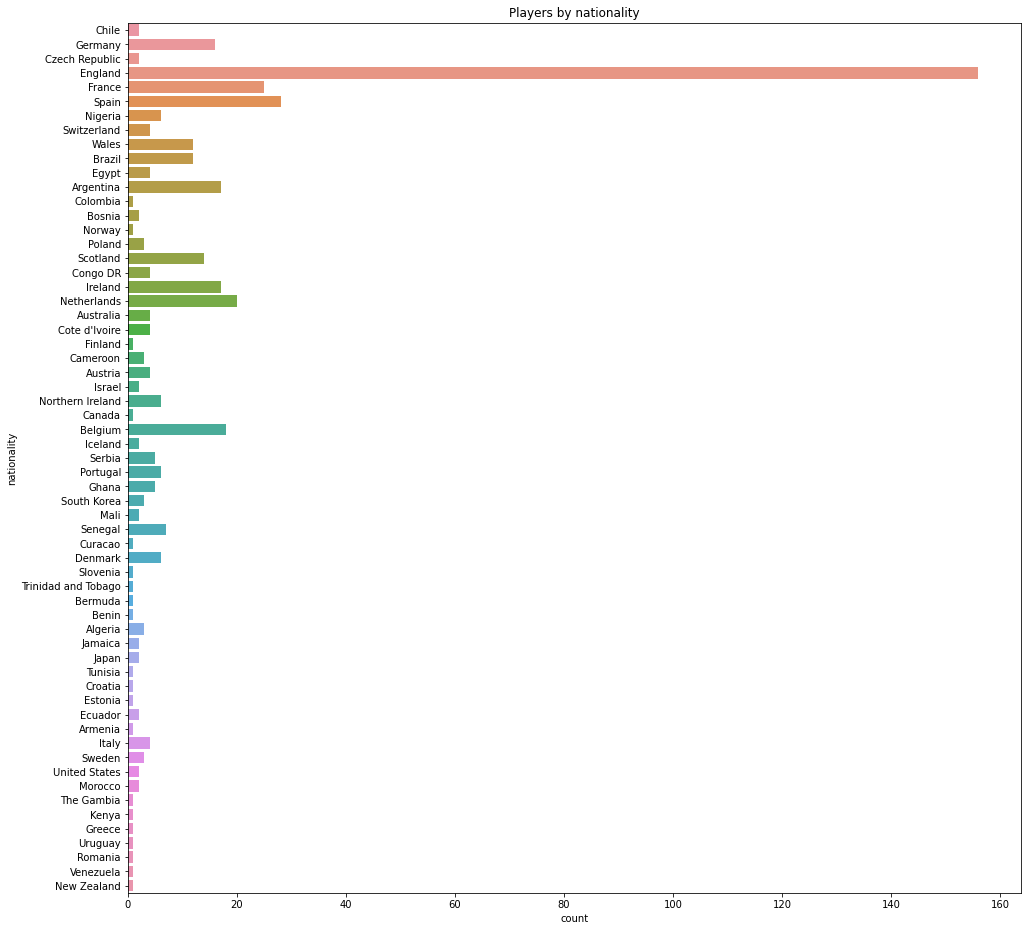

In [152]:
plt.figure(figsize=(16,16))
sns.countplot(data=df,y="nationality")
plt.title("Players by nationality")
plt.show()

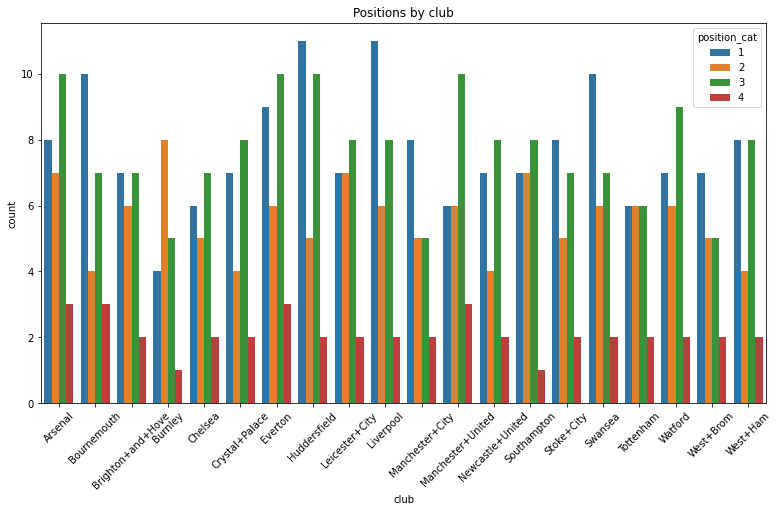

In [67]:
plt.figure(figsize=(13,7))
sns.countplot(data=df,x="club",hue="position_cat")
plt.title("Positions by club")
plt.xticks(rotation=45)
plt.show()

At 2017 most PL teams have many defenders and attackers.

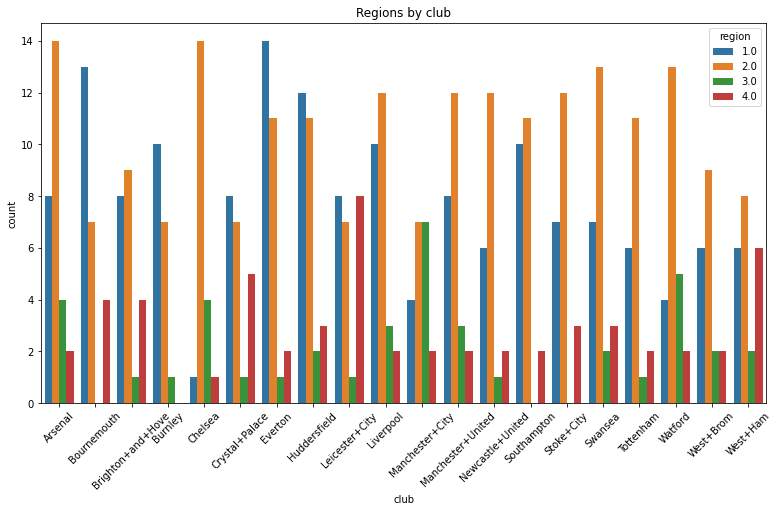

In [68]:
plt.figure(figsize=(13,7))
sns.countplot(data=df,x="club",hue="region")
plt.title("Regions by club")
plt.xticks(rotation=45)
plt.show()

As we can see the majoriy of the PL players are from Europe and England

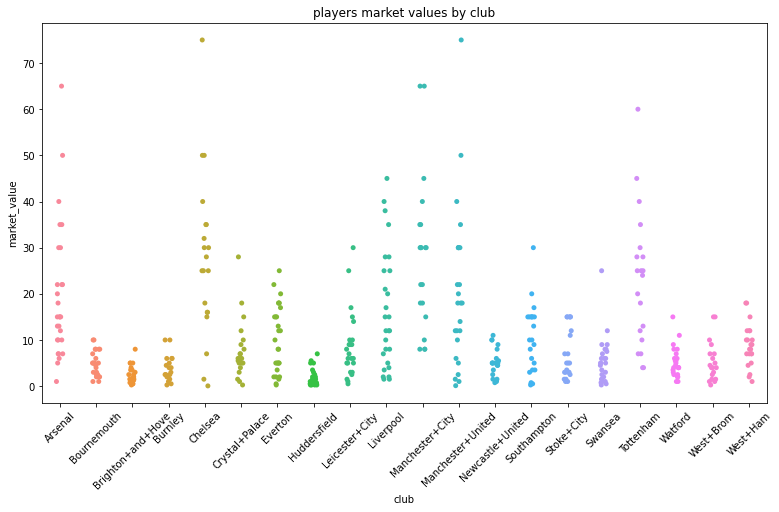

In [75]:
plt.figure(figsize=(13,7))
sns.stripplot(data=df,x="club",y="market_value",dodge=True)
plt.xticks(rotation=45)
plt.title("players market values by club")
plt.show()

As expected the most expensive players are from the biggest clubs: Arsenal,Chelsea, Liverpool, Manchester City,Tottenham

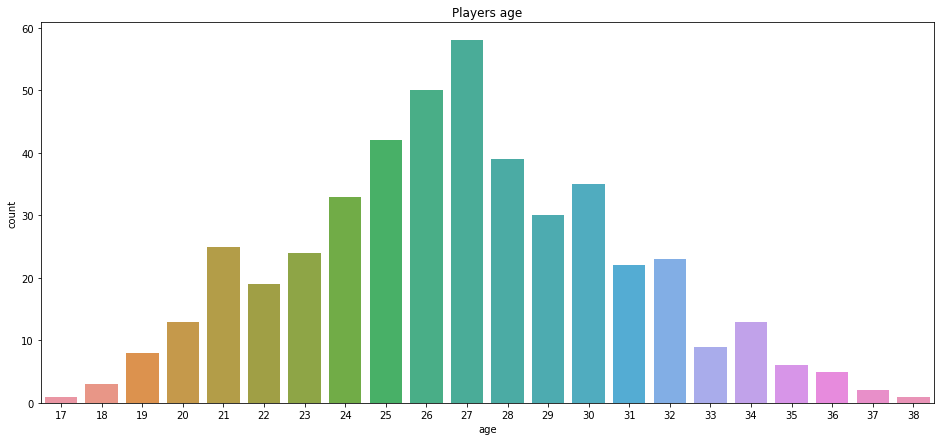

In [156]:
plt.figure(figsize=(16,7))
sns.countplot(data=df,x="age")
plt.title("Players age")
plt.show()

The majority of the PL players are areoun 26-28 years old.

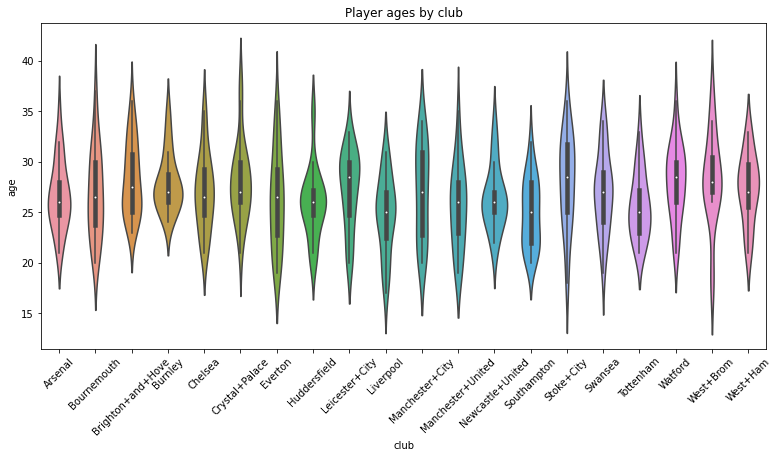

In [157]:
plt.figure(figsize=(13,6))
sns.violinplot(data=df,x="club",y="age",split=True,dodge=True)
plt.xticks(rotation=45)
plt.title("Player ages by club")
plt.show()

/home/alchemistdude/Documents/UNAL/intMLEconomistas/Taller1/env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


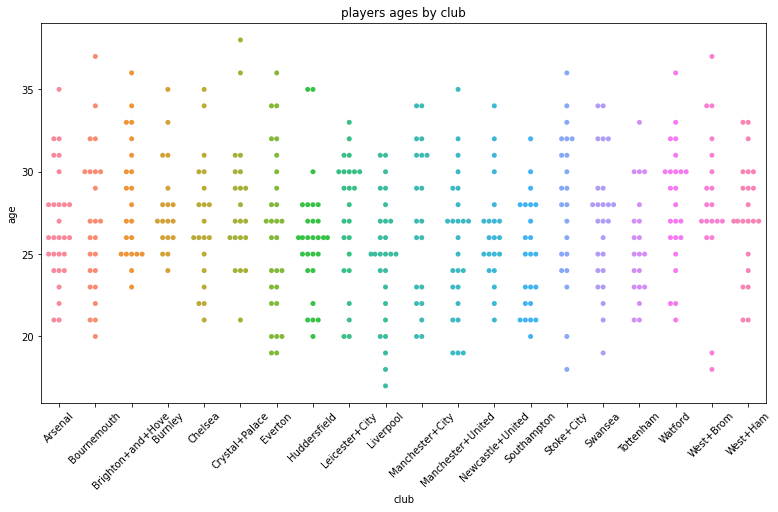

In [91]:
plt.figure(figsize=(13,7))
sns.swarmplot(data=df,x="club",y="age",dodge=True)
plt.xticks(rotation=45)
plt.title("players ages by club")
plt.show()

We can see that the player ages from each club are somehow balanced, Liverpool has the youngest players, other clubs such as Bounermouth, Crystal Palace and West Brom have the oldest players.

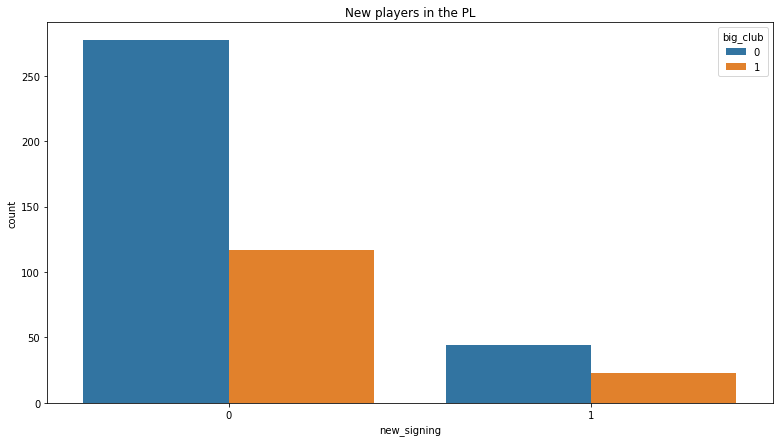

In [100]:
plt.figure(figsize=(13,7))
sns.countplot(data=df,x="new_signing",hue="big_club")
plt.title("New players in the PL")
plt.show()

In [110]:
df[df['new_signing']==1].count()

name            67
club            67
age             67
position        67
position_cat    67
market_value    67
page_views      67
fpl_value       67
fpl_sel         67
fpl_points      67
region          67
nationality     67
new_foreign     67
age_cat         67
club_id         67
big_club        67
new_signing     67
dtype: int64

We can see that 67 is the number of the new players in the PL

In [109]:
df[df['new_signing']==1][df['big_club']==1].count()

/tmp/ipykernel_10718/1905175342.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['new_signing']==1][df['big_club']==1].count()


name            23
club            23
age             23
position        23
position_cat    23
market_value    23
page_views      23
fpl_value       23
fpl_sel         23
fpl_points      23
region          23
nationality     23
new_foreign     23
age_cat         23
club_id         23
big_club        23
new_signing     23
dtype: int64

From that 67 new players, 23 were signed by the biggest clubs.

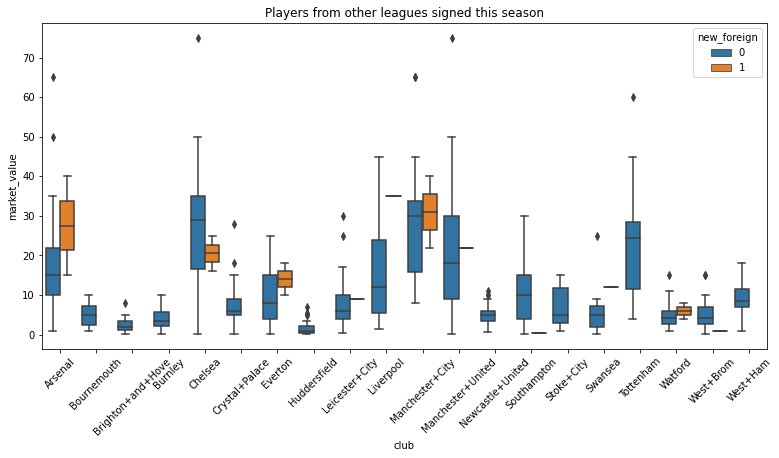

In [140]:
plt.figure(figsize=(13,6))
sns.boxplot(data=df,x="club",y="market_value",hue="new_foreign",dodge=True)
plt.xticks(rotation=45)
plt.title("Players from other leagues signed this season")
plt.show()

Arsenal, Everton, Chelsea, Manchester city adn Watford were the only clubs that signed players from other leagues.

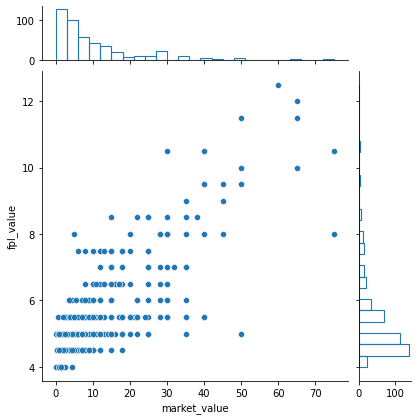

In [127]:
sns.jointplot(data=df,x="market_value",y="fpl_value",marginal_ticks=True,
              marginal_kws=dict(bins=25,fill=False,multiple="dodge" ))
plt.show()

As we can see Fantasy premier League value and market place value are highly correlated.

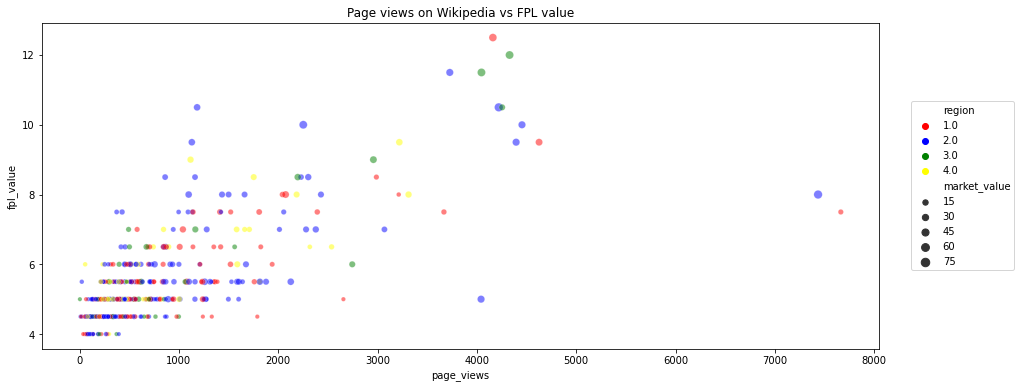

In [138]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x="page_views",y="fpl_value",hue="region",size='market_value',alpha=0.5,palette=['red','blue','green','yellow'])
plt.legend(loc='center',bbox_to_anchor=(1.1,0.5))
plt.title("Page views on Wikipedia vs FPL value")
plt.show()

The PL player with most page views on wikipedia is from England, the player with the highest fpl value is from England too, also with this plot we can see a positive correlation between page views ad fpl value.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1080x432 with 0 Axes>

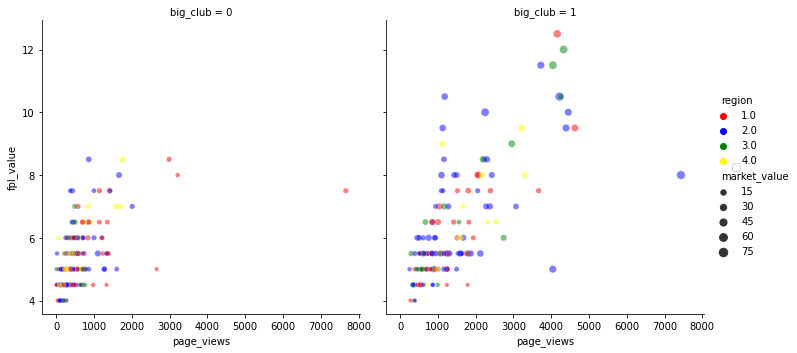

In [169]:
plt.figure(figsize=(15,6))
sns.relplot(data=df,x="page_views",y="fpl_value",hue="region",col='big_club',size='market_value',alpha=0.5,palette=['red','blue','green','yellow'])
plt.legend(loc='center',bbox_to_anchor=(1.1,0.5))
plt.show()

As expected the big club players have more page views than no big club players.

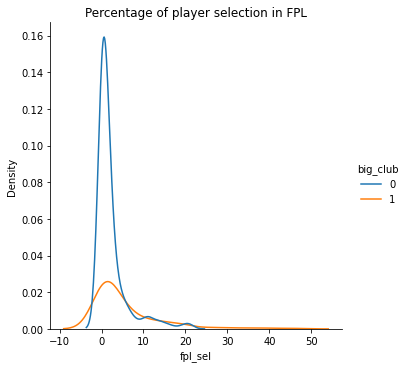

In [187]:

sns.displot(data=df,x='fpl_sel',kind="kde",hue="big_club")
plt.title("Percentage of player selection in FPL")
plt.show()

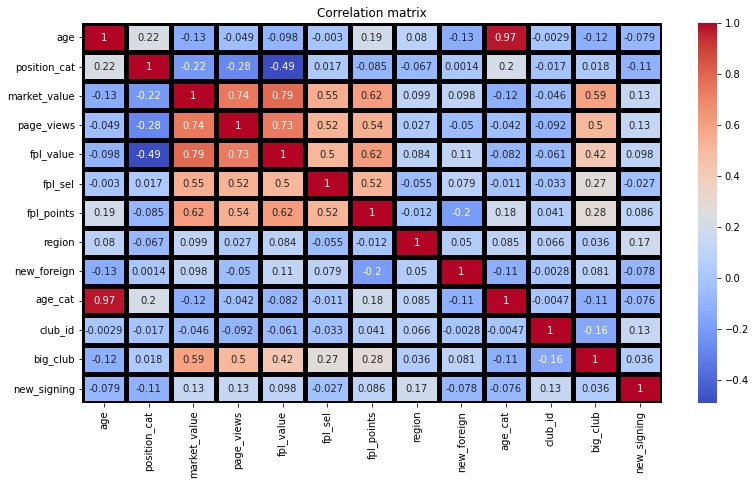

In [182]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=5,linecolor="black")
plt.title("Correlation matrix")
plt.show()

Lets get the dummy variables:

In [191]:
dummies = pd.get_dummies(df[['club','position']],
                        columns=['club','position'],
                        prefix=['club_dummy','position_dummy'])

In [192]:
dummies.head()

,club_dummy_Arsenal,club_dummy_Bournemouth,club_dummy_Brighton+and+Hove,club_dummy_Burnley,club_dummy_Chelsea,club_dummy_Crystal+Palace,club_dummy_Everton,club_dummy_Huddersfield,club_dummy_Leicester+City,club_dummy_Liverpool,...,position_dummy_CM,position_dummy_DM,position_dummy_GK,position_dummy_LB,position_dummy_LM,position_dummy_LW,position_dummy_RB,position_dummy_RM,position_dummy_RW,position_dummy_SS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
df = pd.concat([df,dummies],axis=1)

In [194]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,...,position_dummy_CM,position_dummy_DM,position_dummy_GK,position_dummy_LB,position_dummy_LM,position_dummy_LW,position_dummy_RB,position_dummy_RM,position_dummy_RW,position_dummy_SS
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,...,0,0,0,0,0,1,0,0,0,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,...,0,0,0,0,0,0,0,0,0,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,...,0,0,1,0,0,0,0,0,0,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,...,0,0,0,0,0,0,0,0,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,...,0,0,0,0,0,0,0,0,0,0


With this data we will try to fit a model for predicting the market value of a player.

In [202]:
X = df.drop(['market_value'],axis=1)
y = df['market_value']

Now we make the train and test split:

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)